<a href="https://colab.research.google.com/github/SelvamRaju/AI-ML-Capstone-Project-NLP-Chatbot/blob/truptimali-patch-1/GL_NLP_Capstone_Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NATURAL LANGUAGE PROCESSING - CAPSTONE PROJECT**

#**AIML-CHATBOT INTERFACE**

#**DOMAIN: Industrial safety. NLP based Chatbot**

• CONTEXT:
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the
globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment

 DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an
occurrence of an accident.
Columns description:
‣ Data: timestamp or time/date information
‣ Countries: which country the accident occurred (anonymised)
‣ Local: the city where the manufacturing plant is located (anonymised)
‣ Industry sector: which sector the plant belongs to
‣ Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
‣ Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors
involved in the accident)
‣ Gender: if the person is male of female
‣ Employee or Third Party: if the injured person is an employee or a third party
‣ Critical Risk: some description of the risk involved in the accident
‣ Description: Detailed description of how the accident happened.

• PROJECT OBJECTIVE:
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description

#**‣ Input: Interim report**

#**Process: Step 1: Import the data**

In [1]:
#for reading data from google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
ERROR: Operation cancelled by user


In [3]:
pip install plotly
pip install plotly --upgrade

In [4]:
#ip install plotly-express

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling
import calendar

import warnings
warnings.filterwarnings('ignore')
import plotly
print(plotly.__version__)


5.6.0


In [102]:
df_health=pd.read_csv("/content/drive/My Drive/AIML/Capstone Project Data/IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
df_health.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [103]:
print("No. of Rows and Columns in dataframe")
df_health.shape

No. of Rows and Columns in dataframe


(425, 11)

In [104]:
print("No. of Elements in dataframe")
df_health.size

No. of Elements in dataframe


4675

In [11]:
from pandas_profiling import ProfileReport

In [12]:
#data.profile_report()
prof = ProfileReport(df_health) 
prof
#prof.to_file(output_file='profileReportOutput.html')



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#**Step 2: Data cleansing**

In [105]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [106]:
df_health.isnull().values.any() 

False

In [107]:
df_health.isna().values.any()

False

In [108]:
df_health.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [109]:
df_health.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

In [110]:
df_health.duplicated().sum()

0

In [111]:
df_health.describe()

,Unnamed: 0
count,425.000000
mean,224.084706
std,125.526786
min,0.000000
25%,118.000000
50%,226.000000
75%,332.000000
max,438.000000


In [112]:
df_health.describe(include=['object'])

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,During the activity of chuteo of ore in hopper...
freq,6,251,90,241,316,143,403,189,232,3


In [113]:
#Dropping this column as it will be 1-1 mapping and not useful while training or testing the model
df_health=df_health.drop('Unnamed: 0',axis=1)
df_health.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [114]:
# Rename 'Data', 'Countries', 'Genre', 'Employee or Third Party' columns in Data frame

df_health.rename(columns={'Data':'Date','Countries':'Country','Genre':'Gender','Employee or Third Party':'Employee Type'},inplace=True)
df_health.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


 # **Step 3: Data preprocessing**

In [115]:
print(df_health.Date.max())
print(df_health.Date.min())

2017-07-09 00:00:00
2016-01-01 00:00:00


The whole data set is between 1st January 2016 to 9th July 2017


In [116]:
df_health['Date']=pd.to_datetime(df_health['Date'])
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee Type             425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
dtypes: datetime64[ns](1), object(9)
memory usage: 33.3+ KB


In [117]:
replace_values = {'Local_01': 1, 'Local_02': 2, 'Local_03': 3, 'Local_04': 4, 'Local_05': 5, 'Local_06': 6, 'Local_07': 7, 'Local_08': 8, 'Local_09': 9, 'Local_10': 10, 'Local_11': 11, 'Local_12': 12}
df_health['Local'] = df_health['Local'].map(replace_values)
replace_values = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5}
df_health['Accident Level'] = df_health['Accident Level'].map(replace_values)
replace_values = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
df_health['Potential Accident Level'] = df_health['Potential Accident Level'].map(replace_values)
del replace_values

In [118]:
print(f'Dataset after adjusting categorical values\n')
df_health.head()

Dataset after adjusting categorical values



,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [119]:
df_health.isnull().sum()

Date                        0
Country                     0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Gender                      0
Employee Type               0
Critical Risk               0
Description                 0
dtype: int64

Accidents happen throughout the year added datetime features such as year,month and day.

In [120]:
df_health['Date'] = pd.to_datetime(df_health['Date'])
df_health['Year'] = df_health['Date'].apply(lambda x : x.year)
df_health['Month'] = df_health['Date'].apply(lambda x : x.month)
df_health['Day'] = df_health['Date'].apply(lambda x : x.day)
df_health['Weekday'] = df_health['Date'].apply(lambda x : x.day_name())
df_health['WeekofYear'] = df_health['Date'].apply(lambda x : x.weekofyear)
df_health.head(5)

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1


Dividing the year in quaters



In [121]:
def month_quarter_Conversion(x):
    if x in [10, 11, 12]:
        season = 'Fourth'
    elif x in [1, 2, 3]:
        season = 'First'
    elif x in [4, 5, 6]:
        season = 'Second'
    elif x in [7, 8, 9]:
        season = 'Third'
    return season
df_health['Quarter'] = df_health['Month'].apply(month_quarter_Conversion)

df_health.head(5)


,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,Quarter
0,2016-01-01,Country_01,1,Mining,1,4,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,First
1,2016-01-02,Country_02,2,Mining,1,4,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,First
2,2016-01-06,Country_01,3,Mining,1,3,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,First
3,2016-01-08,Country_01,4,Mining,1,1,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,First
4,2016-01-10,Country_01,4,Mining,4,4,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,First


In [122]:
%matplotlib inline

In [123]:
import matplotlib.pyplot as plt
import numpy as np

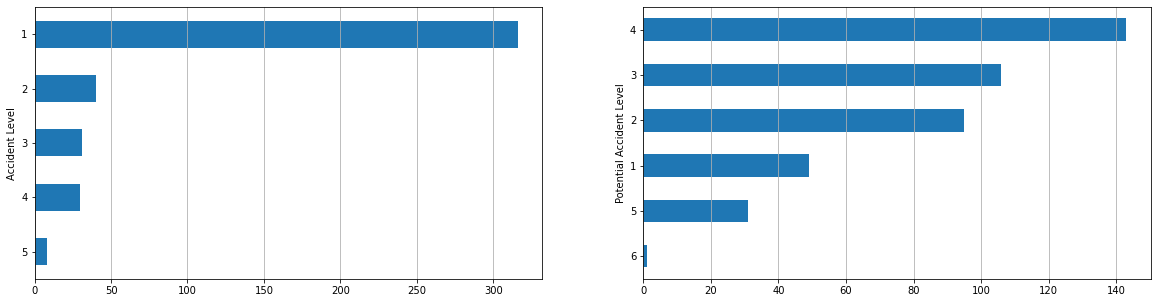

In [124]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
acc_level = "Accident Level"
df_health[acc_level].reset_index().groupby(acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[0]).grid(axis='x')

pot_acc_level = "Potential Accident Level"
df_health[pot_acc_level].reset_index().groupby(pot_acc_level).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax[1]).grid(axis='x')


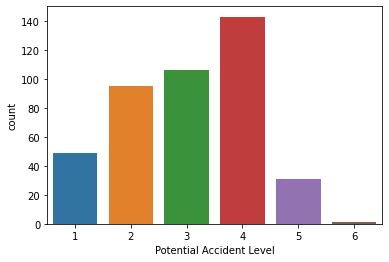

In [125]:
#This shows we have balanced data. 
sns.countplot(x='Potential Accident Level',data=df_health)

In [126]:
#Dealing with categorical variable
#check for unique values in target varibale.
#It contains six values :
df_health['Potential Accident Level'].unique()

array([4, 3, 1, 2, 5, 6])

In [127]:
#check frequency distribution of target variable. 
#check whether data is balanced or imbalanced.
#250 are not severe and 5 are severe cases
df_health['Potential Accident Level'].value_counts()

4    143
3    106
2     95
1     49
5     31
6      1
Name: Potential Accident Level, dtype: int64

In [128]:
#We can check the imbalaned data by caluclating percentage of two classes
df_health['Potential Accident Level'].value_counts(normalize=True)

4    0.336471
3    0.249412
2    0.223529
1    0.115294
5    0.072941
6    0.002353
Name: Potential Accident Level, dtype: float64

In [129]:

df_health['Gender'].value_counts()

Male      403
Female     22
Name: Gender, dtype: int64

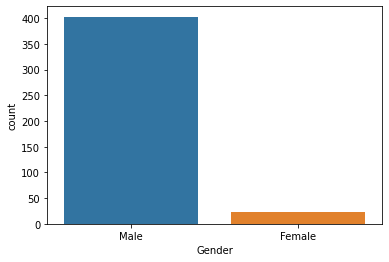

In [130]:
#This shows we have balanced data. 
sns.countplot(x='Gender',data=df_health)

In [131]:
df_health['Industry Sector'].value_counts()

Mining    241
Metals    134
Others     50
Name: Industry Sector, dtype: int64

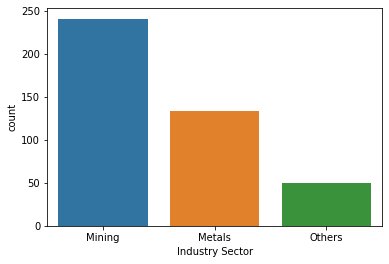

In [132]:
#This shows we have balanced data. 
sns.countplot(x='Industry Sector',data=df_health)

In [133]:
df_health['Employee Type'].value_counts()

Third Party             189
Employee                179
Third Party (Remote)     57
Name: Employee Type, dtype: int64

In [134]:
df_health['Accident Level'].value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64

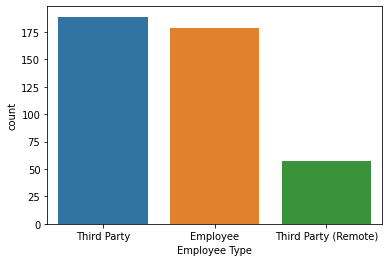

In [135]:
sns.countplot(x='Employee Type',data=df_health)

In [136]:
df_health['Critical Risk'].value_counts()

Others                                       232
Pressed                                       24
Manual Tools                                  20
Chemical substances                           17
Venomous Animals                              16
Cut                                           14
Projection                                    13
Bees                                          10
Fall                                           9
Vehicles and Mobile Equipment                  8
Fall prevention (same level)                   7
remains of choco                               7
Pressurized Systems                            7
Fall prevention                                6
Suspended Loads                                6
Blocking and isolation of energies             3
Pressurized Systems / Chemical Substances      3
Power lock                                     3
Liquid Metal                                   3
Projection of fragments                        2
Machine Protection  

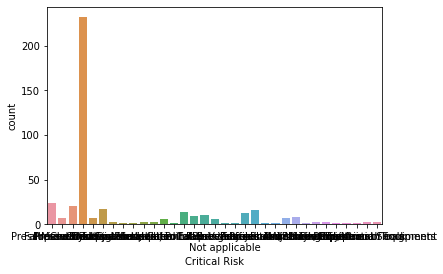

In [137]:
sns.countplot(x='Critical Risk',data=df_health)

In [138]:
df_health['Accident Level'].value_counts()

1    316
2     40
3     31
4     30
5      8
Name: Accident Level, dtype: int64

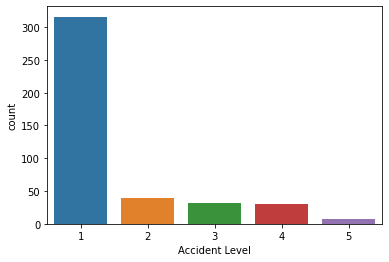

In [139]:
sns.countplot(x='Accident Level',data=df_health)

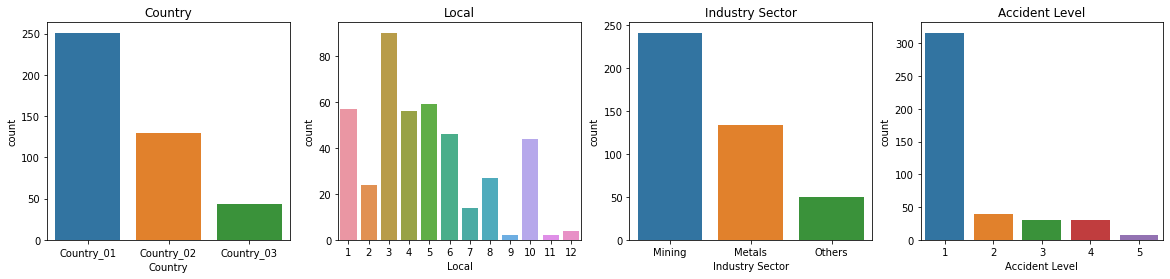

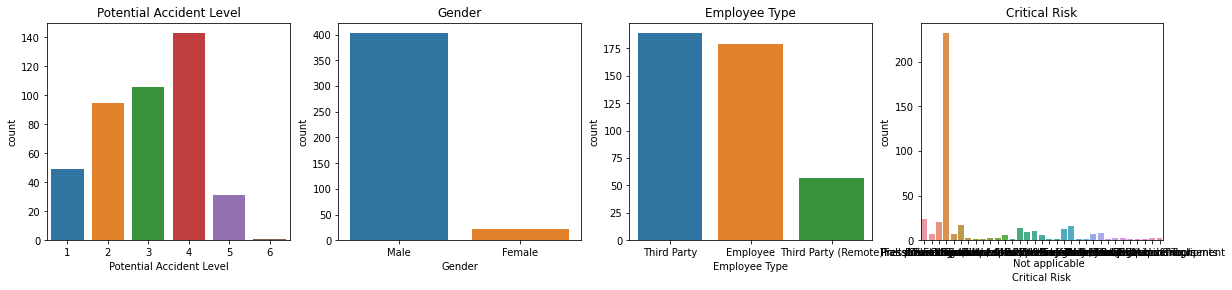

In [140]:
plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Country")
sns.countplot(x='Country',data=df_health)

plt.subplot(1,4,2)
plt.title("Local")
sns.countplot(x='Local',data=df_health)

plt.subplot(1,4,3)
plt.title("Industry Sector")
sns.countplot(x='Industry Sector',data=df_health)

plt.subplot(1,4,4)
plt.title("Accident Level")
sns.countplot(x='Accident Level',data=df_health)

plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.title("Potential Accident Level")
sns.countplot(x='Potential Accident Level',data=df_health)

plt.subplot(1,4,2)
plt.title("Gender")
sns.countplot(x='Gender',data=df_health)

plt.subplot(1,4,3)
plt.title("Employee Type")
sns.countplot(x='Employee Type',data=df_health)

plt.subplot(1,4,4)
plt.title("Critical Risk")
sns.countplot(x='Critical Risk',data=df_health)

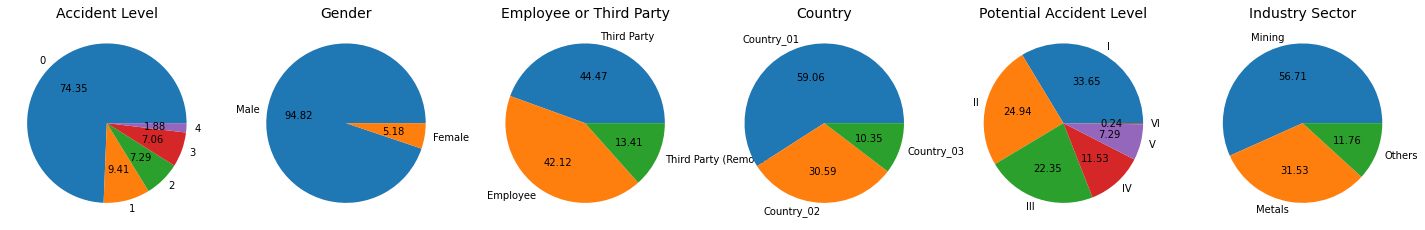

In [141]:
fig=plt.figure(figsize=(25,15))

ax1=fig.add_subplot(1,6,1)
plt.pie(x=df_health['Accident Level'].value_counts(),autopct="%.2f",labels=['0','1','2','3','4'])
plt.title("origin Distribution",fontsize=14)
plt.title("Accident Level",fontsize=14)

ax2=fig.add_subplot(1,6,2)
plt.pie(x=df_health['Gender'].value_counts(),autopct="%.2f",labels=df_health['Gender'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Gender',size=14)

ax3=fig.add_subplot(1,6,3)
plt.pie(x=df_health['Employee Type'].value_counts(),autopct="%.2f",labels=df_health['Employee Type'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title("Employee or Third Party",fontsize=14)

ax4=fig.add_subplot(1,6,4)
plt.pie(x=df_health['Country'].value_counts(),autopct="%.2f",labels=df_health['Country'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Country',size=14)

ax5=fig.add_subplot(1,6,5)
plt.pie(x=df_health['Potential Accident Level'].value_counts(),autopct="%.2f",labels=['I','II','III','IV','V','VI'])
plt.title("origin Distribution",fontsize=14)
plt.title('Potential Accident Level',size=14)

ax6=fig.add_subplot(1,6,6)
plt.pie(x=df_health['Industry Sector'].value_counts(),autopct="%.2f",labels=df_health['Industry Sector'].value_counts().keys())
plt.title("origin Distribution",fontsize=14)
plt.title('Industry Sector',size=14)

plt.show()

# Multivariate Analysis

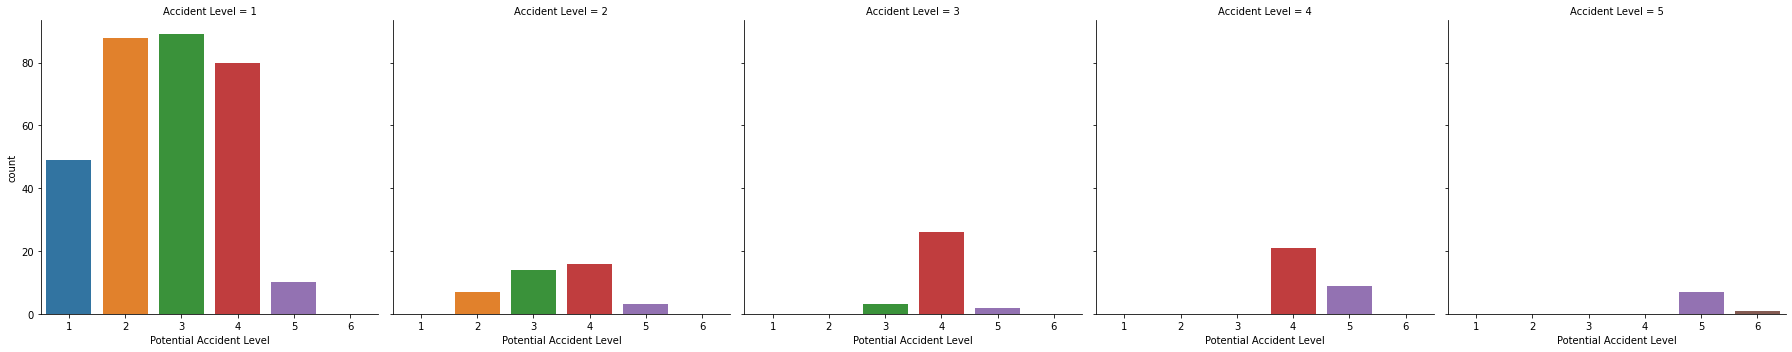

In [142]:
sns.catplot(data=df_health, x="Potential Accident Level",col="Accident Level",kind="count")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

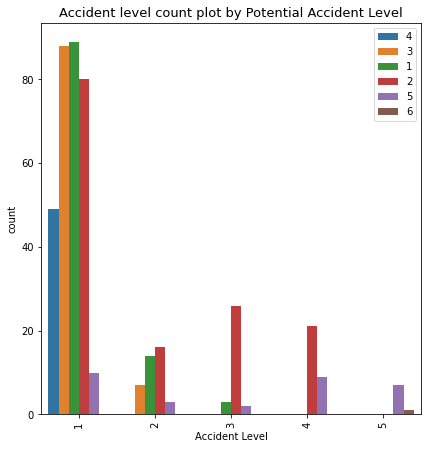

In [143]:
fig2 = plt.figure(figsize = (15, 7.2))
ax1 = fig2.add_subplot(122)
sns.countplot(x = "Accident Level", data = df_health, ax = ax1, orient = 'v',hue = 'Potential Accident Level').set_title("Accident Level".capitalize() +' count plot by Potential Accident Level',fontsize = 13)
plt.legend(labels = df_health['Potential Accident Level'].unique())
plt.xticks(rotation = 90)

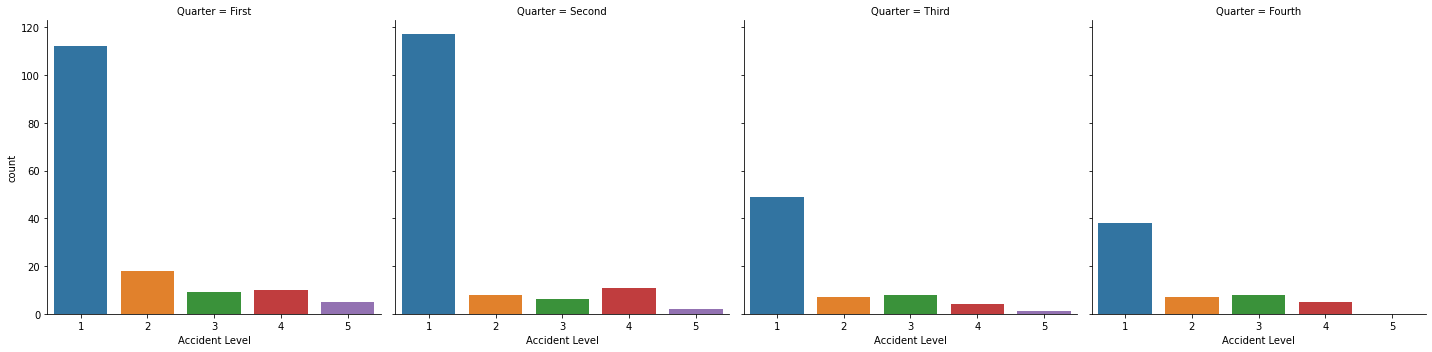

In [145]:
sns.catplot(data=df_health, x="Accident Level",col="Quarter",kind="count")

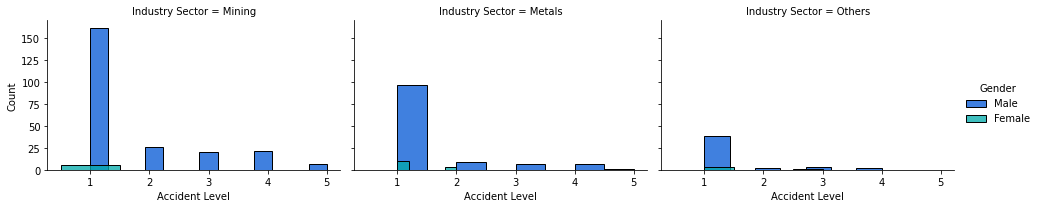

In [146]:
fig=sns.FacetGrid(df_health,aspect=1.5,palette="winter", hue='Gender',col='Industry Sector', legend_out=True)
fig.map(sns.histplot, 'Accident Level')
fig.add_legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=4, borderaxespad=0.5)

In [163]:
# Define a common function to plot multivariate countplot
def plot_multi(df, col1, hue):
    fig = plt.figure(figsize = (8, 4))
    ax = fig.add_subplot(121)
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = hue).set_title(col1.capitalize() +' count plot by '+ hue, 
                                                                      fontsize = 13)
    plt.legend(labels = df[hue].unique())
    #plt.xticks(rotation = 90)
    
    return plt.show()


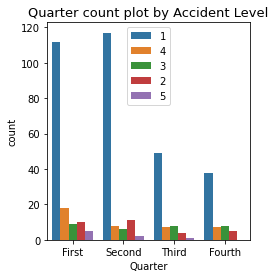

In [148]:
plot_multi(df_health, 'Quarter', 'Accident Level')

1.   Q2 had the highest Accident Level of severity-I. 
2.   No accidents have happened in the Q4




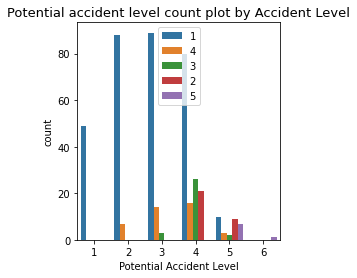

In [149]:
plot_multi(df_health, 'Potential Accident Level', 'Accident Level')

Always the actual Accident Level has been less than the potential one. So looks like there have been mitigation steps have been taken

#Analysis of Gender with Accident/ Potential Accident Level



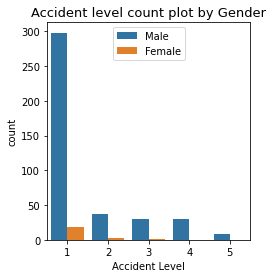

In [150]:
plot_multi(df_health,  "Accident Level",  'Gender')
# Looking at the graph below more male candidates are prone to accidents compared to females

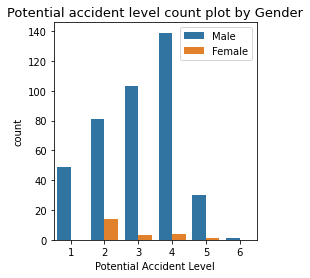

In [151]:
plot_multi(df_health,  "Potential Accident Level",  'Gender')
#Compared to graph below more male have higher potential accident levels compared to females

# Employee type vs Accident and Potential Accident Level analysis

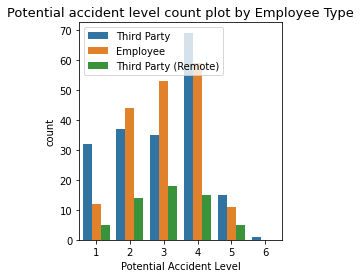

In [152]:
plot_multi(df_health,  "Potential Accident Level",  'Employee Type')
# Third Party(Onsite) working employees are more prone to potential accidents compared other two. 
# Third Party (Remote) working employees are less prone to potential accidents

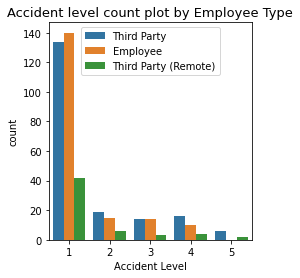

In [153]:
plot_multi(df_health,  "Accident Level",  'Employee Type')
# Employees (Full time) are more prone to accidents compared other two in Accident Severity level I (0).
# For rest of the Accident Severity levels, Third Party employees have hit into accidents, more than rest of the two employee categories on an average.
# Third Party (Remote) working employees are less prone to accidents

# Industry Sector vs Accident and Potential Accident Level analysis

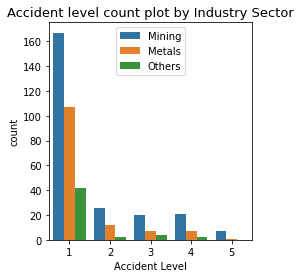

In [154]:
plot_multi(df_health,  "Accident Level",  'Industry Sector')
# Mining industry seems to have more accidents amongst all the other idustries
# Most critical severity incidents seems to have happened in Mining and Metal industries only

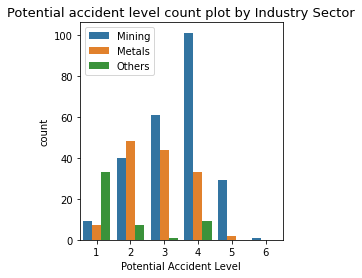

In [155]:
plot_multi(df_health,  "Potential Accident Level",  'Industry Sector')
# Mining industry seems to have more potential for Severity 4 accidents

# Country vs Accident Level analysis

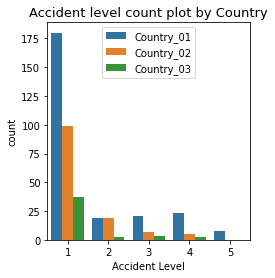

In [156]:
plot_multi(df_health,  "Accident Level",  'Country')
# Country 1 has highest levels of accidents that has happened in the past
#	The most fatal accidents have happened in Country 1 only.
#	Country 1 and 2 share the same number of Sev2 accidents


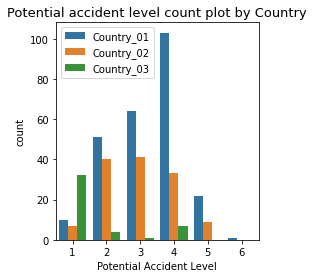

In [157]:
plot_multi(df_health,  "Potential Accident Level",  'Country')


# Accident's monthwise analysis

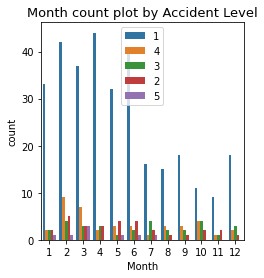

In [159]:
plot_multi(df_health,  "Month",  'Accident Level')
#•	Most of the accidents have happened in the initial 6 months. From July onwards the number and the severity has been reduced
#•	Hence this is an important field to influence the potential accident level
#•	None of the fatal accidents have happened from August onwards.

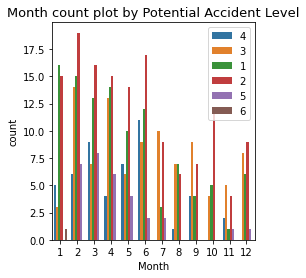

In [161]:
plot_multi(df_health,  "Month",  'Potential Accident Level')
#	Similarly , the potentials of accidents is higher in the first 6 months of the year.
#	Month of Feb shows the highest number of Sev 2 category accident’s potential.
#	Month plays an important role in Potential Accident target level prediction

# Accident's weekday wise analysis

In [169]:

def plot_multi_big(df, col1, hue):
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot()
    sns.countplot(x = col1, data = df, ax = ax, orient = 'v',
                  hue = hue).set_title(col1.capitalize() +' count plot by '+ hue, 
                                                                      fontsize = 13)
    plt.legend(labels = df[hue].unique())
    plt.xticks(rotation = 90)
    
    return plt.show()

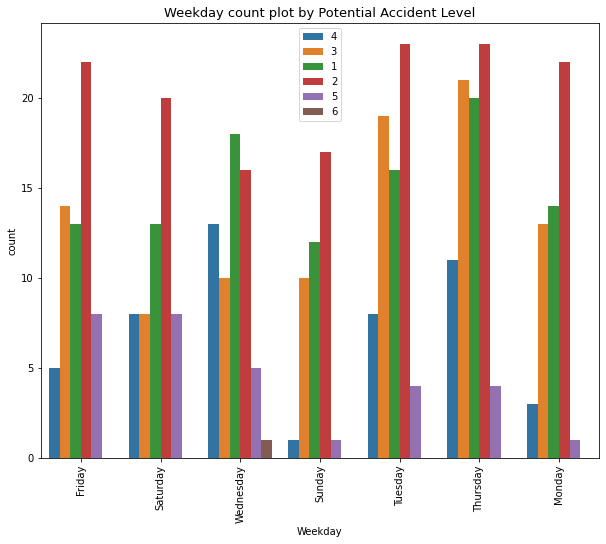

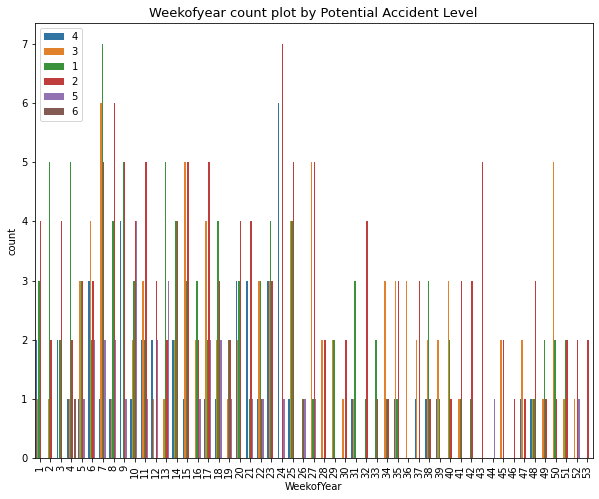

In [172]:
plot_multi_big(df_health,  "Weekday",  'Potential Accident Level')
#	There is less potential of Sev 5 accidents on Monday and Sunday.
#	The most fatal accidents can happen only on Wednesday. (Looking back at the data – there is only one record in the data sheet on 25th Jan 2017 i.e. Wednesday on which the Potential of accident severity was 5 

plot_multi_big(df_health,  "WeekofYear",  'Potential Accident Level')


# Country vs Employee type analysis

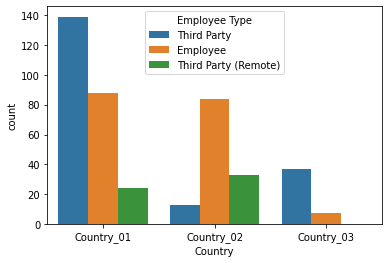

In [175]:
sns.countplot(x="Country", data=df_health, hue='Employee Type')
#Country 1 has most third party contractors
#Country 3 has very less full time employees and no third party remote workers
# Country 2 has very less Thirdparty workers working on site. Most number of full time employees 

# Analyze Country and Industry Sector



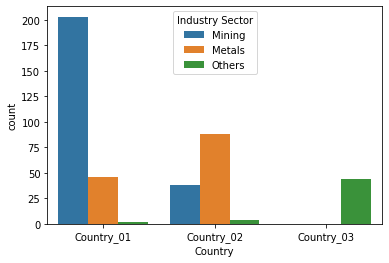

In [176]:
sns.countplot(x="Country", data=df_health, hue='Industry Sector')
#	Country 1 has the highest Mining industries compared to others. Also Mining industry has 56 % of accidents reported from the report. Thus no wonder if Country 1 has the highest number of incidents reported
#	Country 3 has no Mining and Metal industries. Other industries have 11 % of accidents. Country 3 has 10 % of accidents from the reported ones.


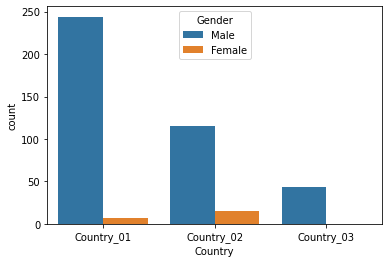

In [177]:
sns.countplot(x="Country", data=df_health,hue="Gender")
# In all the countries male workers are the most. Hence no wonder if the accidents are happening more for Males
#	Country 3 does not have any female worker belonging to the given industries

# Analyze Employee Type and Gender



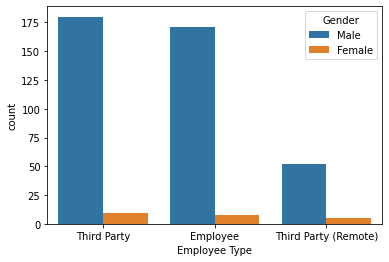

In [178]:
sns.countplot(x="Employee Type", data=df_health,hue="Gender")
#	In all the three employment categories there are more males and those are the most affected ones during these accidents

# Analyze the year , industry and more..

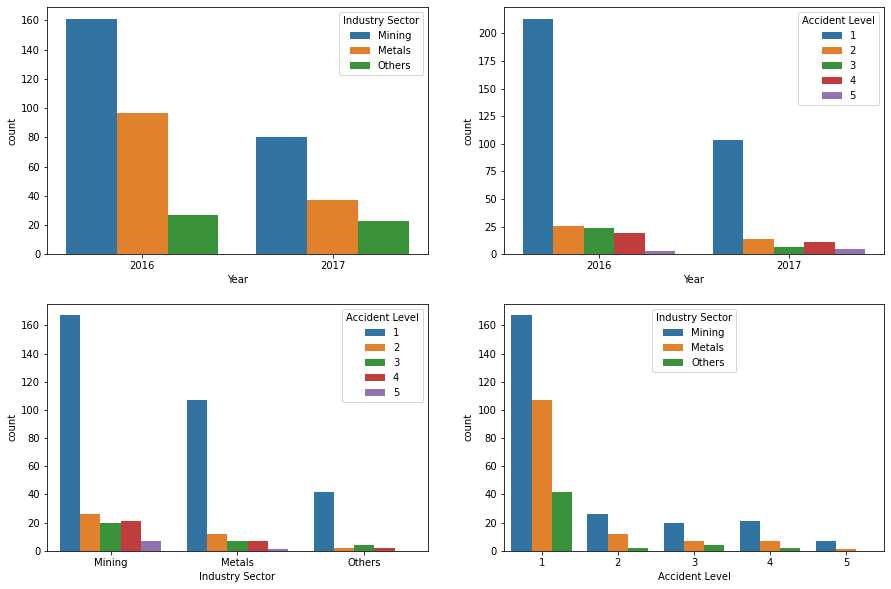

In [179]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df_health['Year'],hue='Industry Sector',data=df_health,ax=axs[0][0])
sns.countplot(x=df_health['Year'],hue='Accident Level',data=df_health,ax=axs[0][1])
sns.countplot(x=df_health['Industry Sector'],hue='Accident Level',data=df_health,ax=axs[1][0])
sns.countplot(x=df_health['Accident Level'],hue='Industry Sector',data=df_health,ax=axs[1][1])

# Analyze the description data

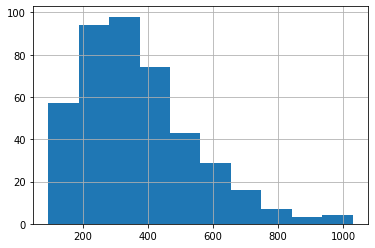

In [181]:
#Number of characters present in each description sentence

df_health['Description'].str.len().hist()


No of words appearing in every description

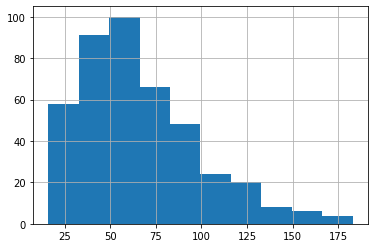

In [182]:
df_health['Description'].str.split().map(lambda x: len(x)).hist()


Average word length is as below

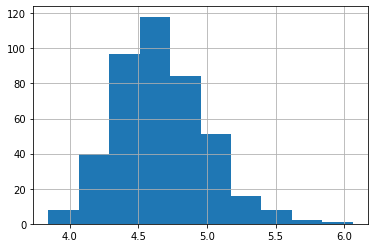

In [183]:
df_health['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#Stop word analysis

In [186]:
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def plot_top_stopwords_barchart(text):
    
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
    


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


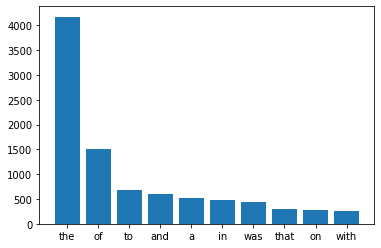

In [185]:
plot_top_stopwords_barchart(df_health['Description'])  

#Non stop word analysis

In [187]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

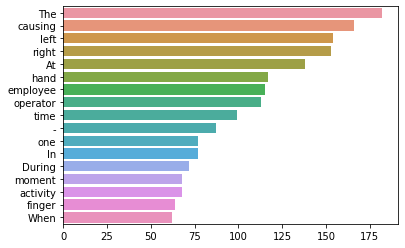

In [188]:
plot_top_non_stopwords_barchart(df_health['Description']) 


# N Gram analysis

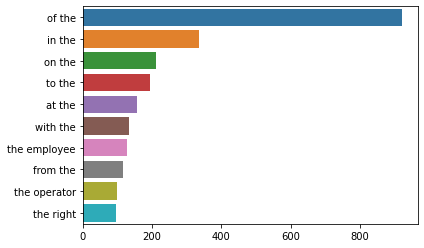

In [190]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)
    
plot_top_ngrams_barchart(df_health['Description'],2)

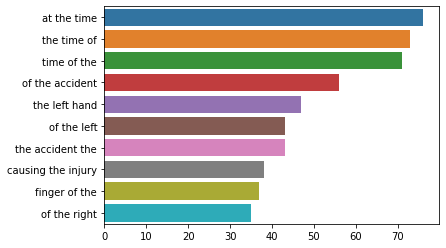

In [191]:
plot_top_ngrams_barchart(df_health['Description'],3)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


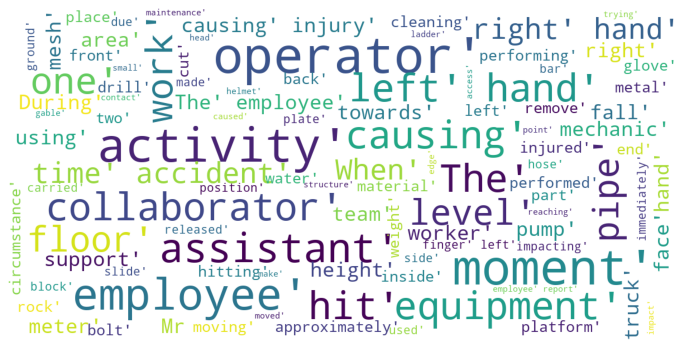

In [192]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
   
plot_wordcloud(df_health['Description'])

# TFIDF Feature



In [195]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem

feature_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=3000, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(df_health['Description']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    feature_df = pd.concat([feature_df, tfs], axis=1)
feature_df = pd.concat([df_health, feature_df], axis=1)
feature_df.head(3)
X.shape

(425, 3000)

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


feature_df['Country'] = LabelEncoder().fit_transform(feature_df['Country']).astype(np.int8)
feature_df['Local'] = LabelEncoder().fit_transform(feature_df['Local']).astype(np.int8)
feature_df['Industry Sector'] = LabelEncoder().fit_transform(feature_df['Industry Sector']).astype(np.int8)
feature_df['Accident Level'] = LabelEncoder().fit_transform(feature_df['Accident Level']).astype(np.int8)
feature_df['Potential Accident Level'] = LabelEncoder().fit_transform(feature_df['Potential Accident Level']).astype(np.int8)
feature_df['Gender'] = LabelEncoder().fit_transform(feature_df['Gender']).astype(np.int8)
feature_df['Employee Type'] = LabelEncoder().fit_transform(feature_df['Employee Type']).astype(np.int8)
feature_df['Critical Risk'] = LabelEncoder().fit_transform(feature_df['Critical Risk']).astype(np.int8)
feature_df['Weekday'] = LabelEncoder().fit_transform(feature_df['Weekday']).astype(np.int8)
feature_df['Quarter'] = LabelEncoder().fit_transform(feature_df['Quarter']).astype(np.int8)
feature_df.drop(['Date','Description', 'Description'],axis=1,inplace=True)
feature_df.head(3)

,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Year,Month,...,TFIDF_work sustained shotcreterepentinamente,TFIDF_worked hooked beam,TFIDF_worker crouching area,TFIDF_worker time accident,TFIDF_worker wearing safety,TFIDF_workers abratech company,TFIDF_workers company incimmet,TFIDF_workers rubs helmet,TFIDF_workers used helmets,TFIDF_xixás target members
0,0,0,1,0,3,1,1,20,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,0,3,1,0,21,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2,1,0,2,1,2,15,2016,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
